In [28]:
import math

def function(variable):
    return (math.exp(variable))

firstNode = 0
lastNode = 10
splitting = 100
x = []
c = []
def middleRectangles (firstNode, lastNode, splitting):
    h = (lastNode - firstNode) / splitting
    I = 0
    for i in range(splitting + 1):
        if i == 0:
            x.append(firstNode)
        elif i == splitting:
            x.append(lastNode)
        else:
            x.append(firstNode + i * h)
    for i in range(splitting):
        c.append((x[i]+x[i+1])/2)
        I += function(c[i]) * h    
    return I


print(middleRectangles(firstNode, lastNode, splitting))

22016.29119339272


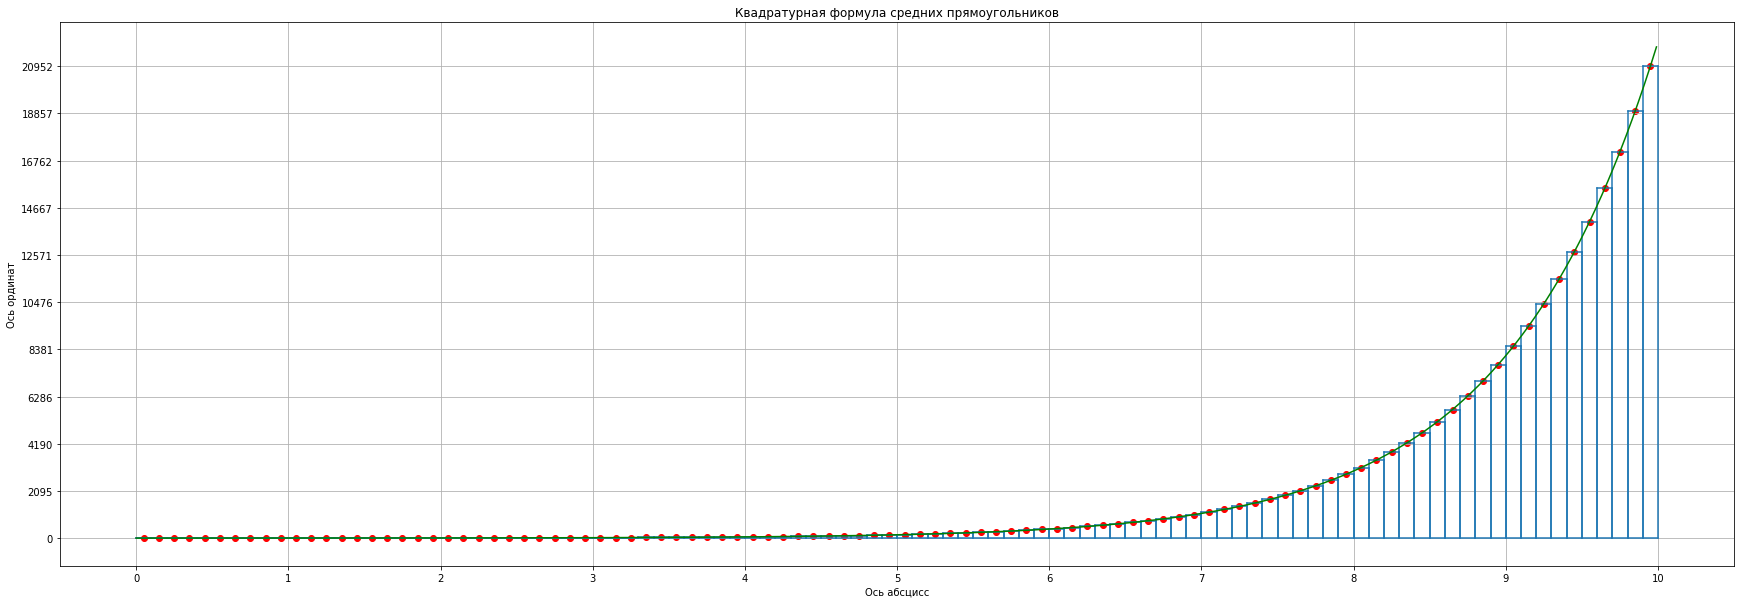

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D

x = [i/100 for i in range(1000) if i/100 >= firstNode if i/100 <= lastNode]
y = [function(x[i]) for i in range(len(x))]


h = (lastNode - firstNode) / splitting
z = [firstNode + h*k for k in range(splitting+1)]
w = [function(c[k]) for k in range(splitting)]

max = 0 
min = 0

for i in range(splitting):
    if w[i] > max:
        max = w[i]
    if w[i] < min:
        min = w[i]
    
cValues = [function(c[i]) for i in range(splitting)]
xticks = (lastNode - firstNode)/10
yticks = (max - min) / 10
xx = [firstNode + i*xticks for i in range(11)]
yy = [min + i*yticks for i in range(11)]


fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(111)

ax.set_xticks(xx)
ax.set_yticks(yy)

for i in range(splitting):
    l1 = Line2D([z[i], z[i]], [0, w[i]])
    l2 = Line2D([z[i+1], z[i+1]], [0, w[i]])
    l3 = Line2D([z[i], z[i+1]], [w[i], w[i]])
    ax.add_line(l1)
    ax.add_line(l2)
    ax.add_line(l3)
    
ax.add_line(Line2D([firstNode,lastNode], [0,0]))
ax.plot(x, y, 'g')
ax.scatter(c, cValues, color = 'red')
ax.grid(True)

# В отличие от интерфейса pyplot, команды для назначения подписей 
# нужно употреблять с приставкой set_

ax.set_title(u'Квадратурная формула средних прямоугольников')
ax.set_xlabel(u'Ось абсцисс')
ax.set_ylabel(u'Ось ординат')

plt.show()